In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
uri = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv'
dados = pd.read_csv(uri, sep=';', encoding='ISO-8859-1', skiprows=3, skipfooter=16, engine='python')
dados.to_csv('../dados/tuberculose_ano_mes_diagnostico.csv', index_label = False)
dados.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez,Total
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627,87265
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809,92859
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303,93773
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196,92980
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541,92056


In [5]:
dados.drop('Total', axis = 1, inplace=True)
dados.drop(19, inplace=True)


In [6]:
dados

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541
5,2006,7385,6687,8132,6804,7593,6984,7101,7722,6793,7005,6674,6151
6,2007,7342,6204,8115,7266,7368,6591,7184,7564,6712,7465,6695,6094
7,2008,7355,6646,7278,7612,6895,6929,7688,7797,7631,7564,6799,6574
8,2009,7113,6452,8146,7514,7168,6702,7443,7368,7388,7285,7016,6723
9,2010,6912,6403,8308,7049,6973,6621,7128,7389,7165,7210,7047,7176


In [7]:
dados_st = dados.melt(id_vars='Ano Diagnóstico', value_name='casos', var_name='Mês')
dados_st

,Ano Diagnóstico,Mês,casos
0,2001,Jan,8088
1,2002,Jan,8013
2,2003,Jan,8115
3,2004,Jan,7574
4,2005,Jan,7432
...,...,...,...
223,2015,Dez,6844
224,2016,Dez,6672
225,2017,Dez,7020
226,2018,Dez,6900


In [8]:
a_converter_mes = dict(zip(dados_st['Mês'].unique(),np.arange(1,13)))
a_converter_mes['Jan']

1

In [9]:
dados_st['data'] = dados_st['Ano Diagnóstico'] + '-' + (dados_st['Mês'].map(a_converter_mes).apply(str))
dados_st.data = pd.to_datetime(dados_st.data)
dados_st = dados_st[['data', 'casos']]
dados_st

,data,casos
0,2001-01-01,8088
1,2002-01-01,8013
2,2003-01-01,8115
3,2004-01-01,7574
4,2005-01-01,7432
...,...,...
223,2015-12-01,6844
224,2016-12-01,6672
225,2017-12-01,7020
226,2018-12-01,6900


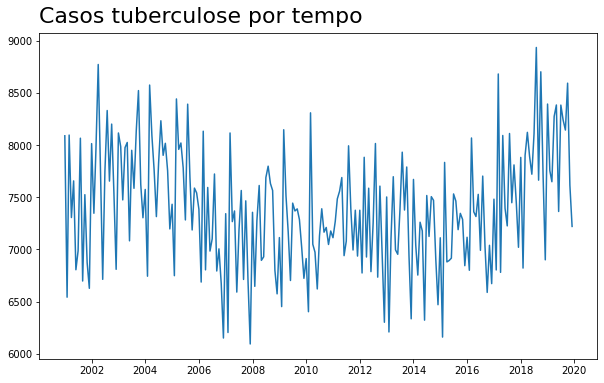

In [26]:
ax = sns.lineplot(x = 'data', y = 'casos', data = dados_st)
ax.figure.set_size_inches(10,6)
ax.set_title('Casos tuberculose por tempo', fontsize =22, loc = 'left', pad = 10)
ax.set_xlabel('', fontsize = 16)
ax.set_ylabel('', fontsize = 16)
ax;
